In [1]:
import os
import warnings

import cv2
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [2]:
os.chdir('/Users/igor/Downloads/mirflickr')
np.random.seed(4)
imageFiles = [f for f in os.listdir() if f.endswith('.jpg')]
sample = np.random.choice(imageFiles, 250)
images = np.array([cv2.split(cv2.imread(im))[1] for im in sample])

2)	Провести декомпозицію каналу зеленого кольору тестових зображень з використанням методу головних компонент (PCA):

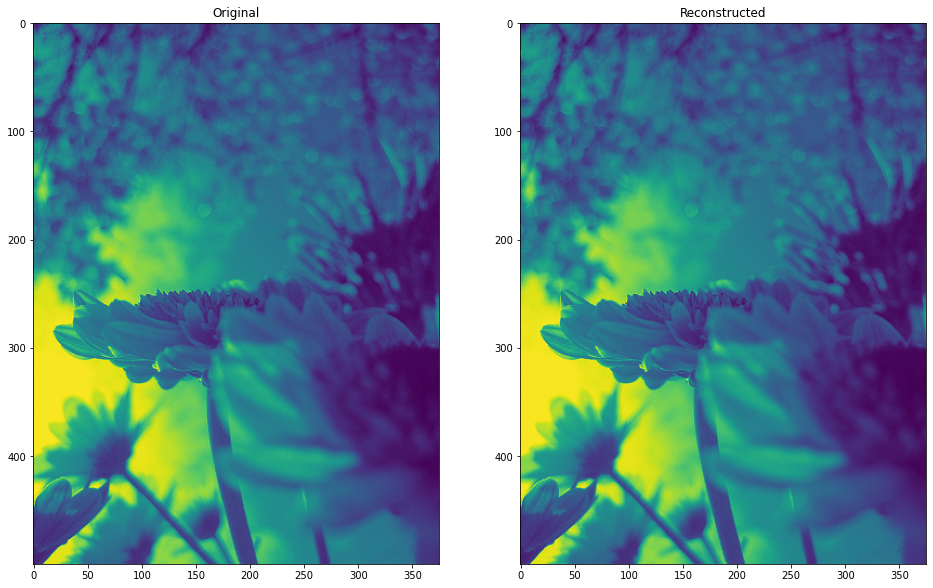

In [3]:
def decompose(image, nComponents=None, transform=True):
    aPca = PCA(n_components = nComponents, svd_solver = 'full')
    component = aPca.fit_transform(image)
    if transform:
        return aPca.inverse_transform(component)

    return aPca, component

reconstructed = decompose(images[0])

plot.figure(figsize=(16,16))
plot.subplot(121)
plot.title('Original')
plot.imshow(images[0])

plot.subplot(122)
plot.title('Reconstructed')
plot.imshow(reconstructed);

Для каналу зеленого кольору тестових зображень обчислити наступні характеристики розподілу значень яскравості пікселів:

Впорядкувати отримані компоненти вихідного зображення в порядку зменшення значень сингулярних чисел (від найбільшого S_min до найменшого S_max значення);

In [4]:
np.set_printoptions(suppress =True)
aPca, component = decompose(images[0], transform=False)
aPca.singular_values_

array([12686.82714701,  9517.59392531,  6101.47436908,  5519.41444808,
        3600.70085403,  2881.28600754,  2835.66392899,  2665.16938492,
        2464.11252145,  2245.60829554,  1878.7453249 ,  1785.92029794,
        1725.08027852,  1621.66191719,  1483.47236889,  1424.05144294,
        1265.98995692,  1241.10904022,  1162.6988645 ,  1120.18980298,
        1035.60237345,  1007.24991818,   973.47684078,   934.61874683,
         890.7085331 ,   839.87885684,   817.19353406,   800.29844414,
         779.48530161,   760.42773652,   724.19133201,   672.05945993,
         669.42869143,   659.83301077,   630.85178178,   613.15900964,
         575.83309704,   570.75647999,   544.76194045,   528.15217865,
         509.33711582,   480.65701609,   472.7979993 ,   439.4273665 ,
         424.8555066 ,   412.05118323,   406.46109304,   392.07240947,
         384.42313863,   372.28521762,   370.66851016,   360.4231589 ,
         346.10811885,   343.99443008,   333.29839186,   328.66800951,
      

Провести реконструкцію зображення при використанні лише частки (α%) компонентів розкладу, що характеризуються відмінними від нуля сингулярними числами (s_i≠0).
Розглянути випадок, коли α змінюється від α_min=10% до α_max=100% з кроком ∆_α=10%.
Порівняти вихідне та реконструйоване зображення за показником середньоквадратичного відхилення (MSE).

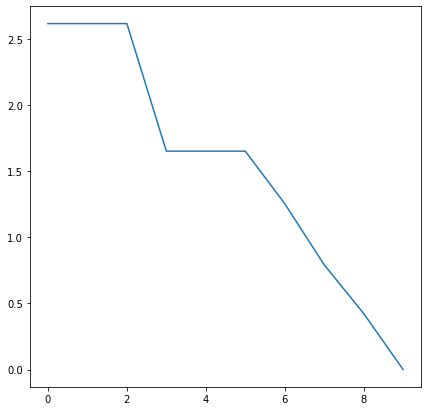

In [5]:
msError = np.array([mean_squared_error(
    images[0],
    decompose(images[0],nComponents = alpha * 0.1 if alpha < 10 else None)
) for alpha in range(1,11)]) / len(images[0])
plot.figure(figsize=(7,7))
plot.plot(msError)

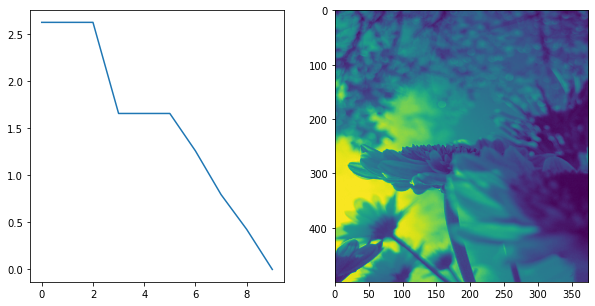

In [6]:
plot.figure(figsize = (10, 5))

plot.subplot(121)
plot.plot(msError)

plot.subplot(122)
plot.imshow(images[0], aspect = 'auto');

Побудувати графіки залежності (MSE) ̅(α), де (MSE) ̅- значення середньо-квадратичного відхилення між
вихідним та реконструйованим зображеннями, усереднені по тестовому пакету;

In [7]:
fullMsError = np.zeros(1)
for image in images:
    fullMsError = np.add(
        fullMsError,
        np.array(
            [mean_squared_error(
                image,
                decompose(
                    image,
                    nComponents = alpha * 0.1 if alpha < 10 else None
                )
            ) for alpha in range(1,11)]
        ) / len(image)
    )

In [8]:
fullMsError = fullMsError / len(images)

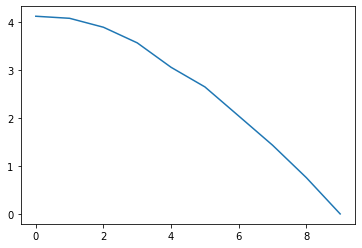

In [9]:
plot.plot(fullMsError)

Провести моделювання каналу зеленого кольору тестових зображень з використанням марківських ланцюгів першого порядку M_1:

Отримати стохастичну матрицю для каналу зеленого кольору при обробці пікселів (згідно номеру студента в списку групи, за модулем кількості варіантів):
По горизонталі, зліва направо – M_1^→ (I_(x,y),I_(x+1,y) );
По горизонталі, справа наліво – M_1^← (I_(x,y),I_(x-1,y) );
По вертикалі, зверху вниз – M_1^↓ (I_(x,y),I_(x,y+1) );
По вертикалі, знизу вгору – M_1^↑ (I_(x,y),I_(x,y-1) );
По головній діагоналі – M_1^↘ (I_(x,y),I_(x+1,y+1) );
По головній діагоналі – M_1^↖ (I_(x,y),I_(x-1,y-1) );
По побічній діагоналі – M_1^↙ (I_(x,y),I_(x-1,y+1) );
По побічній діагоналі – M_1^↗ (I_(x,y),I_(x+1,y-1) );
В протоколі роботи графічно показати вид марківського ланцюга для діапазону яскравості пікселів I_(x,y)∈[i;i×10], де i- номеру студента в списку групи;

In [10]:
def imageIterationUp(image, matrix):
    height, width = image.shape
    for i in range(height - 1):
        for j in range(width):
            val1 = image[height - i - 2][j]
            val2 = image[height - i - 1][j]
            matrix[val1][val2] += 1

matrix = np.zeros((256, 256))
for image in images:
    imageIterationUp(image, matrix)
matrix = matrix / matrix.sum(axis = 1)[:,np.newaxis]

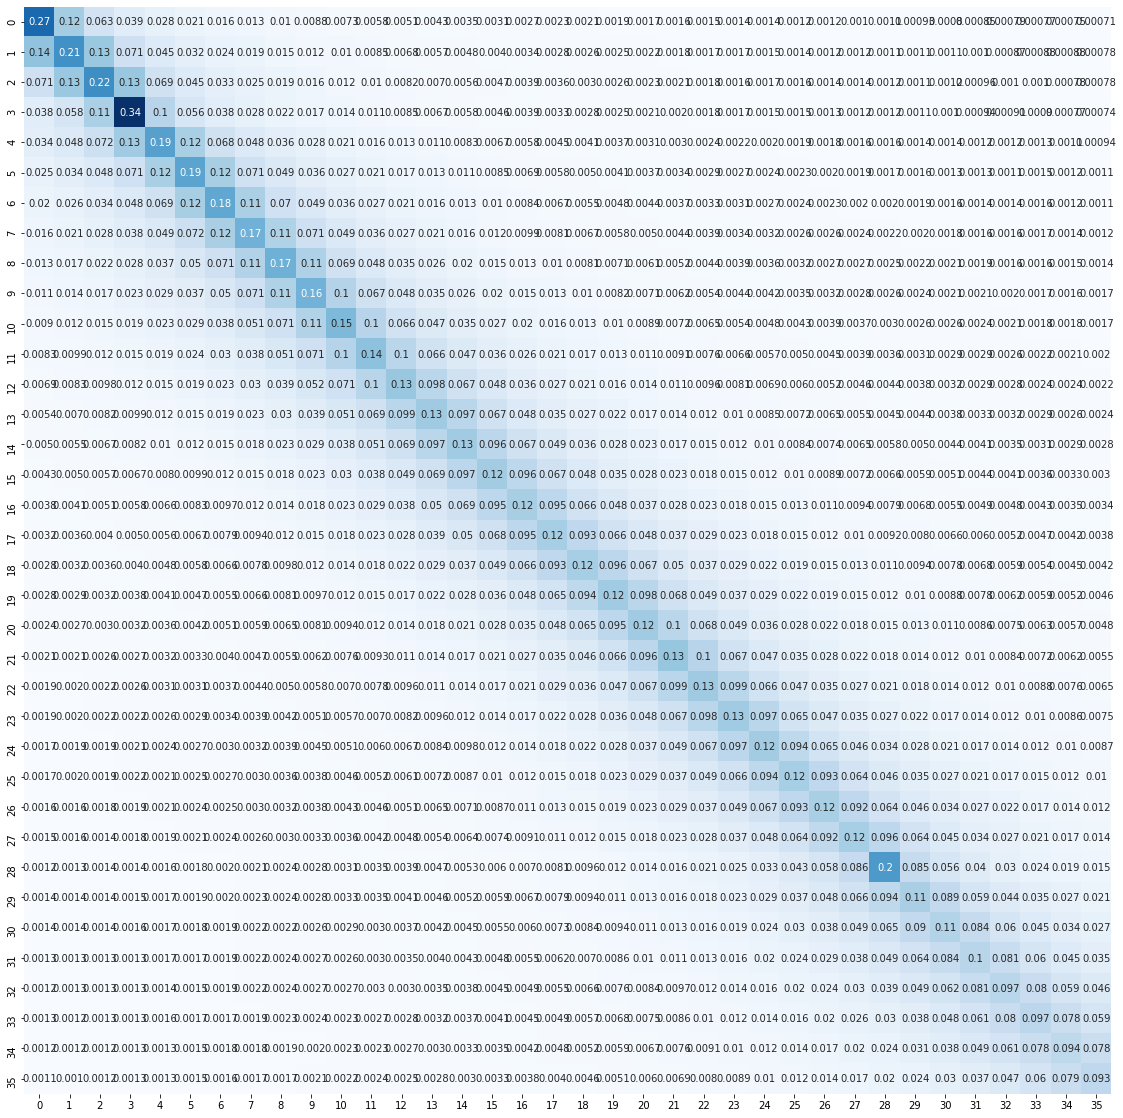

In [11]:
plot.figure(figsize=(20,20))
sns.heatmap(matrix[4:4*10,4:4*10],square=True,cbar=False,cmap='Blues',annot=True)
plot.show()

Для отриманих марківських ланцюгів перевірити виконання властивості регулярності та рекурентності після проходження 5 ітерацій роботи.

In [12]:
regression = np.linalg.matrix_power(matrix, 5)
regression = (regression <= 0).sum() == 0
regression

True

In [13]:
def recurrenceCheck(matrix, k):
    matrix2 = np.linalg.matrix_power(matrix, k)
    for i in range(matrix2.shape[0]):
        if matrix2[~i, i] == 0:
            return False

        return True


In [14]:
recurrent = recurrenceCheck(matrix, k = 5)

In [15]:
recurrent

True